In [1]:
import saspy
sas = saspy.SASsession()

Using SAS Config named: oda
SAS Connection established. Subprocess id is 8576



### proc means


In [2]:
sas.sasdata('cars', 'sashelp').head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0



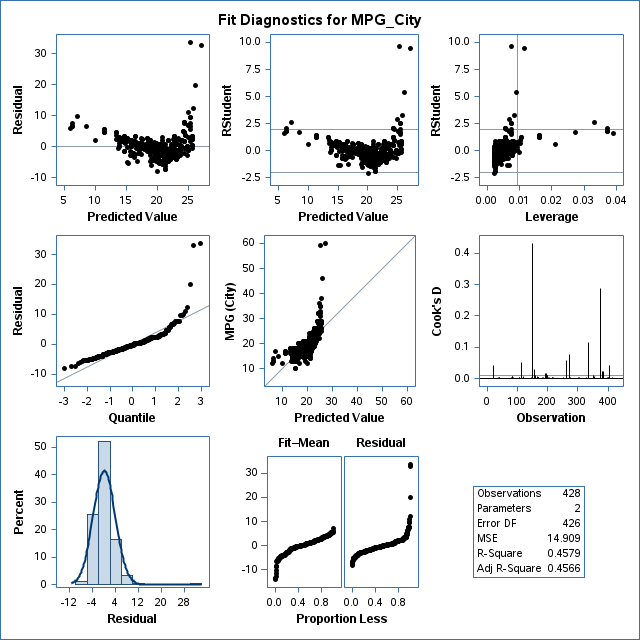
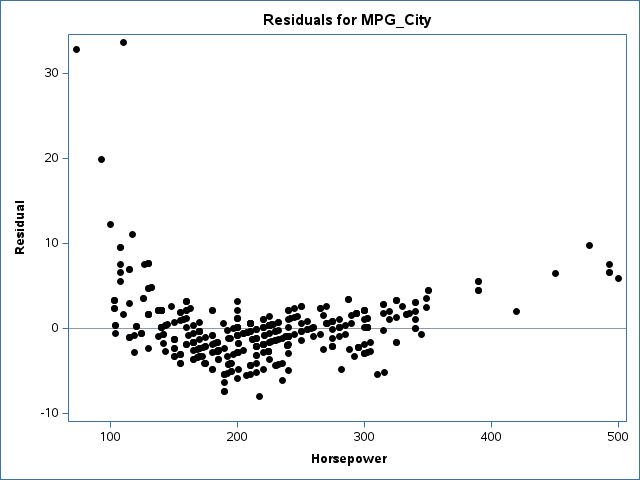
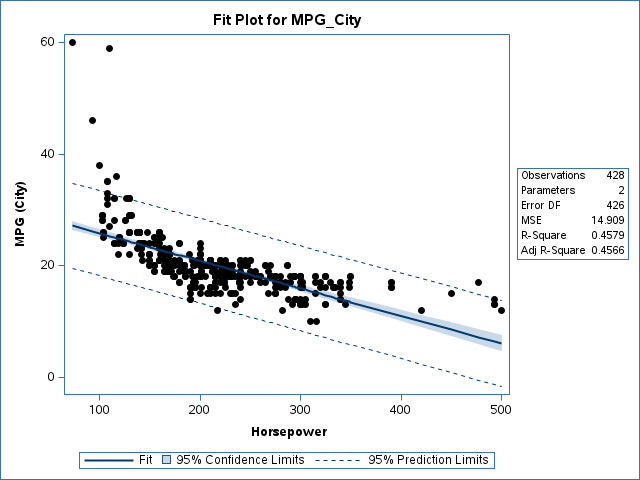

In [3]:
sas.submitLST(f"""
    
    PROC REG DATA=sashelp.cars OUTEST=estimates;
        MODEL MPG_City = Horsepower;
    RUN;
    QUIT;

""")

In [4]:
sas.submitLST(f"""
    
    %let INTERCEPT = 30.71347;
    %let SLOPE = -0.04934;

    DATA scored;
        SET sashelp.cars;
        IF (_N_ = 1) THEN SET estimates;
        PRED_MPG_City = &INTERCEPT + Horsepower * &SLOPE;
    RUN;
              
    PROC PRINT DATA=scored;
        var Make Model Horsepower MPG_City PRED_MPG_City;
    RUN;

""")

Obs,Make,Model,Horsepower,MPG_City,PRED_MPG_City
1,Acura,MDX,-0.049,-1,30.7159
2,Acura,RSX Type S 2dr,200.000,24,20.8455
3,Acura,TSX 4dr,200.000,22,20.8455
4,Acura,TL 4dr,270.000,20,17.3917
5,Acura,3.5 RL 4dr,225.000,18,19.6120
6,Acura,3.5 RL w/Navigation 4dr,225.000,18,19.6120
7,Acura,NSX coupe 2dr manual S,290.000,17,16.4049
8,Audi,A4 1.8T 4dr,170.000,22,22.3257
9,Audi,A41.8T convertible 2dr,170.000,23,22.3257
10,Audi,A4 3.0 4dr,220.000,20,19.8587



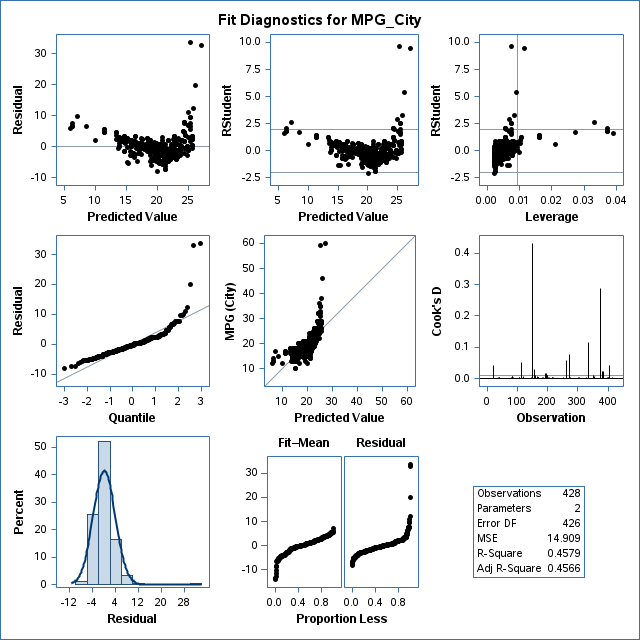
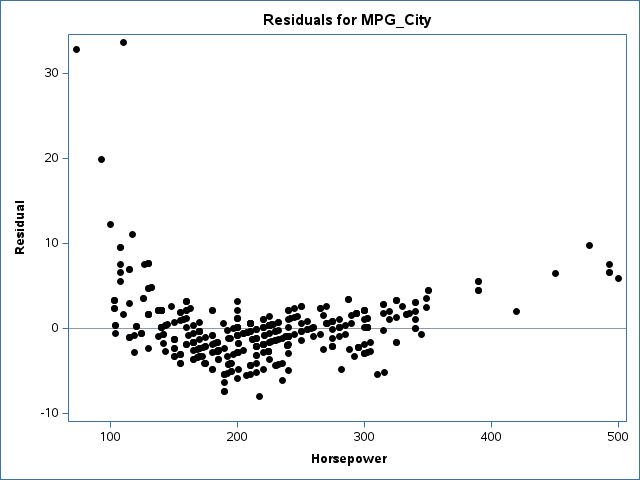
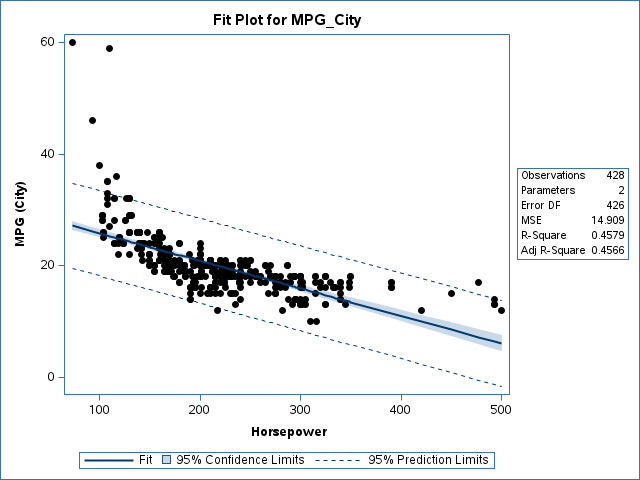

In [5]:
sas.submitLST(f"""
    PROC REG DATA=sashelp.cars OUTEST=estimates;
        MODEL MPG_City = Horsepower;
    RUN;
    QUIT;

    DATA scored;
        SET sashelp.cars;
        IF (_N_ = 1) THEN SET estimates;
        PRED_MPG_City = INTERCEPT + Horsepower*Horsepower;
    RUN;


""")


